In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv("booking.csv")

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.shape

(36275, 19)

In [7]:
print("Row count of out data is {}".format(data.shape[0]))

Row count of out data is 36275


In [8]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
data.iloc[data["no_of_previous_cancellations"].idxmax()]

Booking_ID                                 INN12098
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                       190
arrival_year                                   2018
arrival_month                                     4
arrival_date                                      9
market_segment_type                         Offline
repeated_guest                                    1
no_of_previous_cancellations                     13
no_of_previous_bookings_not_canceled              1
avg_price_per_room                             70.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 12097,

In [11]:
data.iloc[data["no_of_previous_cancellations"].idxmin()]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

In [12]:
data.iloc[data["avg_price_per_room"].idxmax()]

Booking_ID                                 INN33115
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                        35
arrival_year                                   2018
arrival_month                                     3
arrival_date                                     25
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                            540.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 33114,

In [13]:
data.iloc[data["avg_price_per_room"].idxmin()]

Booking_ID                                   INN00064
no_of_adults                                        1
no_of_children                                      0
no_of_weekend_nights                                0
no_of_week_nights                                   1
type_of_meal_plan                         Meal Plan 1
required_car_parking_space                          0
room_type_reserved                        Room_Type 1
lead_time                                           2
arrival_year                                     2017
arrival_month                                       9
arrival_date                                       10
market_segment_type                     Complementary
repeated_guest                                      0
no_of_previous_cancellations                        0
no_of_previous_bookings_not_canceled                0
avg_price_per_room                                0.0
no_of_special_requests                              1
booking_status              

In [14]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [18]:
data['no_of_children'].value_counts().sort_values(ascending=False)

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

<Axes: xlabel='no_of_children', ylabel='count'>

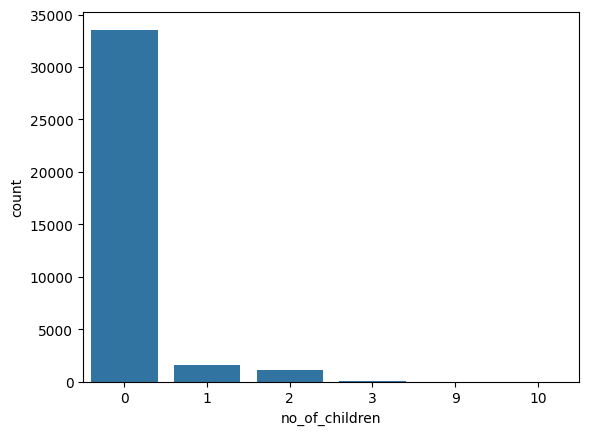

In [19]:
sns.countplot(x='no_of_children', data = data)

In [20]:
data['type_of_meal_plan'].value_counts().sort_values(ascending=False)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

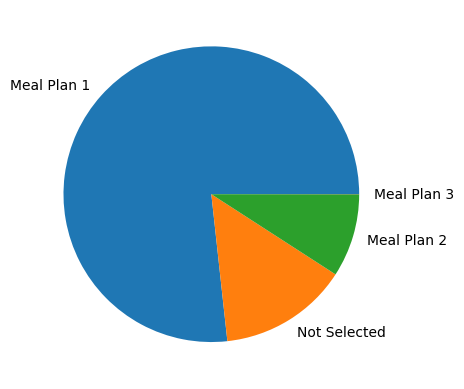

In [23]:
mealtypelabels = data['type_of_meal_plan'].unique()
plt.pie(data['type_of_meal_plan'].value_counts(),labels=mealtypelabels)
plt.show()

In [24]:
data['room_type_reserved'].value_counts().sort_values(ascending=False)

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

<Axes: xlabel='room_type_reserved', ylabel='count'>

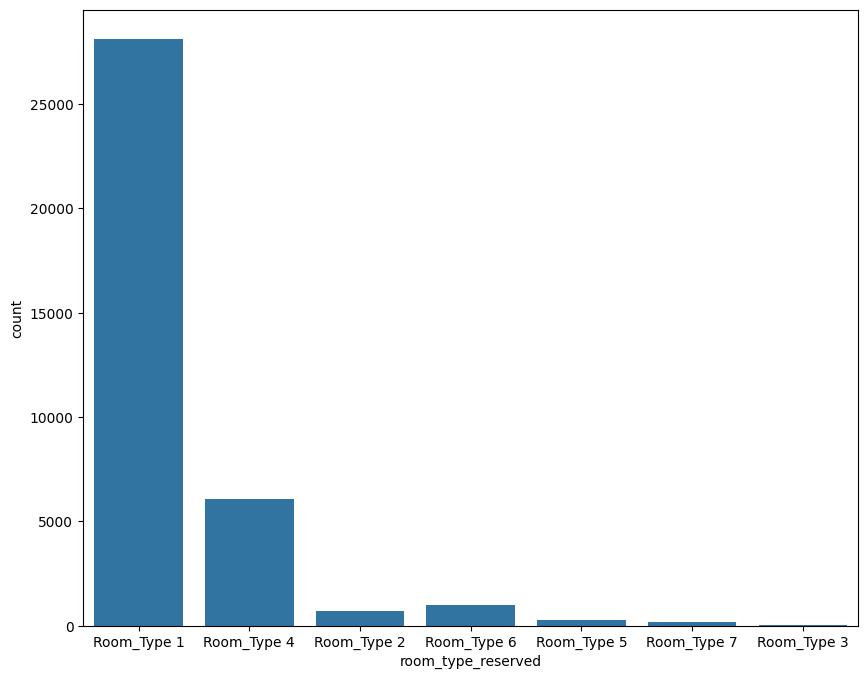

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(x='room_type_reserved',data=data)

In [29]:
data['required_car_parking_space'].value_counts().sort_values(ascending=False)

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

<Axes: xlabel='required_car_parking_space', ylabel='count'>

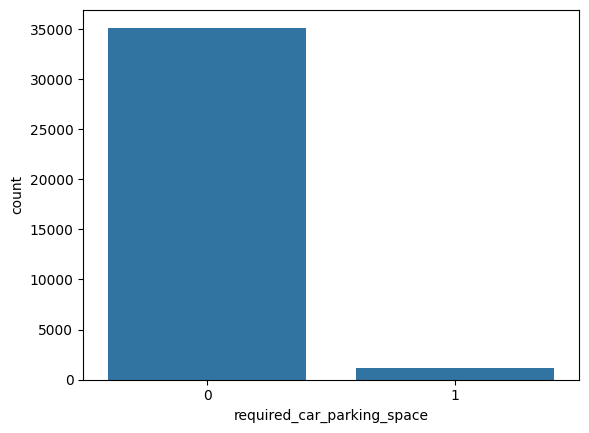

In [31]:
sns.countplot(x='required_car_parking_space', data=data)

In [33]:
data['booking_status'].value_counts().sort_values(ascending=False)

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

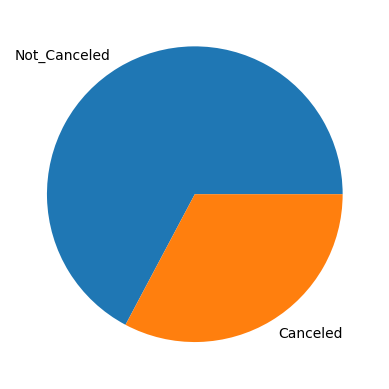

In [35]:
bookinglabels = data['booking_status'].unique()
plt.pie(data['booking_status'].value_counts(), labels=bookinglabels)
plt.show()

In [36]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [37]:
data = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'type_of_meal_plan','room_type_reserved','no_of_previous_cancellations','avg_price_per_room','booking_status']]

In [38]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,Meal Plan 1,Room_Type 1,0,65.00,Not_Canceled
1,2,0,2,3,Not Selected,Room_Type 1,0,106.68,Not_Canceled
2,1,0,2,1,Meal Plan 1,Room_Type 1,0,60.00,Canceled
3,2,0,0,2,Meal Plan 1,Room_Type 1,0,100.00,Canceled
4,2,0,1,1,Not Selected,Room_Type 1,0,94.50,Canceled


In [40]:
labelencoder = preprocessing.LabelEncoder()
data['type_of_meal_plan'] = labelencoder.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = labelencoder.fit_transform(data['room_type_reserved'])
data['booking_status'] = labelencoder.fit_transform(data['booking_status'])
data.head()

C:\Users\lucia\AppData\Local\Temp\ipykernel_9700\1422222083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_meal_plan'] = labelencoder.fit_transform(data['type_of_meal_plan'])
C:\Users\lucia\AppData\Local\Temp\ipykernel_9700\1422222083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type_reserved'] = labelencoder.fit_transform(data['room_type_reserved'])
C:\Users\lucia\AppData\Local\Temp\ipykernel_9700\1422222083.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,0,0,0,65.00,1
1,2,0,2,3,3,0,0,106.68,1
2,1,0,2,1,0,0,0,60.00,0
3,2,0,0,2,0,0,0,100.00,0
4,2,0,1,1,3,0,0,94.50,0


In [41]:
data.corr()['booking_status'].sort_values(ascending=True)

avg_price_per_room             -0.142569
no_of_week_nights              -0.092996
no_of_adults                   -0.086920
no_of_weekend_nights           -0.061563
no_of_children                 -0.033078
type_of_meal_plan              -0.026706
room_type_reserved             -0.022986
no_of_previous_cancellations    0.033728
booking_status                  1.000000
Name: booking_status, dtype: float64

<Axes: >

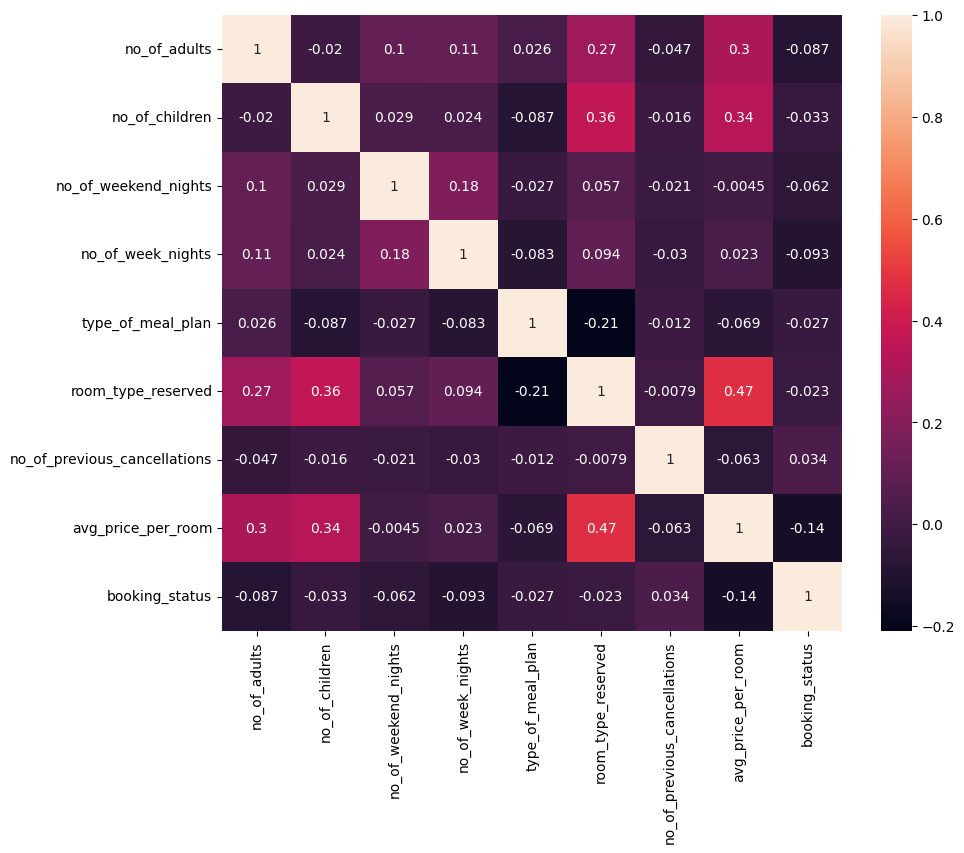

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(),annot=True)